### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [4]:
### Data Collection
import pandas_datareader as pdr
key=""

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [10]:
df1=df.reset_index()['Close']

In [11]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
5       234.60
6       234.90
7       235.05
8       236.60
9       233.95
10      222.65
11      216.00
12      222.00
13      222.95
14      221.05
15      222.40
16      223.70
17      236.70
18      234.30
19      236.00
20      234.55
21      233.35
22      237.05
23      231.00
24      235.45
25      240.55
26      245.15
27      243.00
28      239.35
29      237.55
         ...  
2005    120.50
2006    117.60
2007    117.75
2008    118.15
2009    117.00
2010    116.45
2011    116.70
2012    111.50
2013    113.05
2014    108.85
2015    110.10
2016    111.25
2017    114.15
2018    112.55
2019    113.90
2020    112.30
2021    112.85
2022    112.10
2023    114.05
2024    116.50
2025    118.30
2026    117.30
2027    116.05
2028    116.60
2029    118.25
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
5       234.60
6       234.90
7       235.05
8       236.60
9       233.95
10      222.65
11      216.00
12      222.00
13      222.95
14      221.05
15      222.40
16      223.70
17      236.70
18      234.30
19      236.00
20      234.55
21      233.35
22      237.05
23      231.00
24      235.45
25      240.55
26      245.15
27      243.00
28      239.35
29      237.55
         ...  
2005    120.50
2006    117.60
2007    117.75
2008    118.15
2009    117.00
2010    116.45
2011    116.70
2012    111.50
2013    113.05
2014    108.85
2015    110.10
2016    111.25
2017    114.15
2018    112.55
2019    113.90
2020    112.30
2021    112.85
2022    112.10
2023    114.05
2024    116.50
2025    118.30
2026    117.30
2027    116.05
2028    116.60
2029    118.25
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(1322, 713)

In [19]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
20/20 [==============================] - 23s 1s/step - loss: 0.0012 - val_loss: 8.8315e-04
Epoch 2/20
20/20 [==============================] - 23s 1s/step - loss: 0.0011 - val_loss: 0.0014
Epoch 3/20
20/20 [==============================] - 23s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/20
20/20 [==============================] - 23s 1s/step - loss: 0.0013 - val_loss: 9.8804e-04
Epoch 5/20
20/20 [==============================] - 22s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/20
20/20 [==============================] - 23s 1s/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/20
20/20 [==============================] - 22s 1s/step - loss: 9.1452e-04 - val_loss: 7.6693e-04
Epoch 8/20
20/20 [==============================] - 22s 1s/step - loss: 8.6643e-04 - val_loss: 9.8661e-04
Epoch 9/20
20/20 [==============================] - 22s 1s/step - loss: 8.4697e-04 - val_loss: 8.6575e-04
Epoch 10/20
20/20 [==============================] - 23s 1s/step - loss: 8.4925e-04 - 

In [88]:
import tensorflow as tf

In [89]:
tf.__version__

'2.6.0'

In [90]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [71]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.029675070022883613

In [92]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.03303670782976796

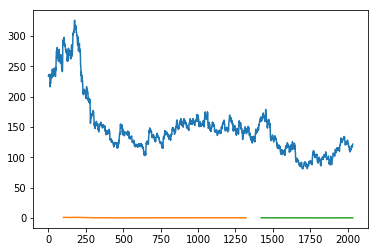

In [93]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
len(test_data)

713

In [95]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 372)

In [96]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [98]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=53
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((-1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

In [99]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [100]:
import matplotlib.pyplot as plt

In [101]:
len(df1)

2035

ValueError: x and y must have same first dimension, but have shapes (100,) and (877, 1)

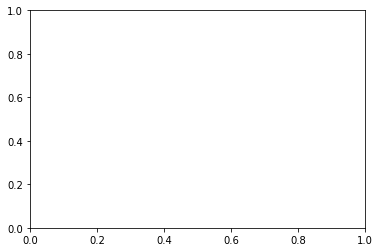

In [102]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

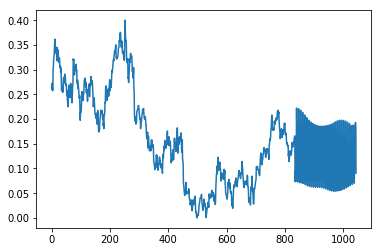

In [103]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [106]:
df3=scaler.inverse_transform(df3).tolist()

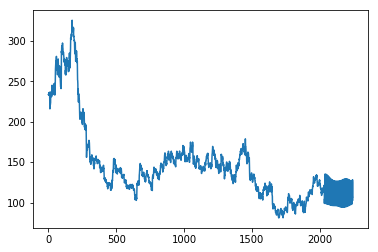

In [105]:
plt.plot(df3)